In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rio
import rasterstats
from pprint import pprint
import scipy.stats as stats
import seaborn as sns
import textwrap
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [2]:
df = pd.read_csv('/home/adalvis/github/micro_diff/data/csv/relationships_new_new.csv')

In [3]:
# df['Incision'] = df['Incision'] * -1

In [4]:
# df = df.sort_values('Incision', axis=0, ascending=True, kind='quicksort', na_position='last')

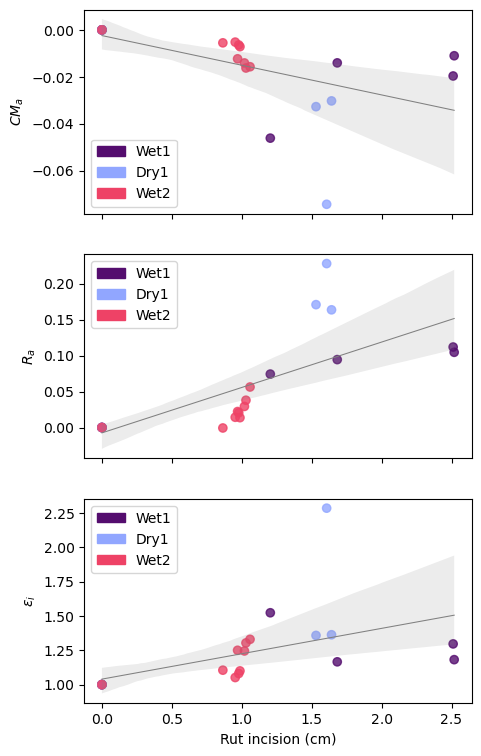

In [5]:
colors = {'Wet1': '#540D6E', 'Dry1': '#91A6FF', 'Wet2':'#EE4266'}
color_list=[colors[group] for group in df['year']]
# color_list = ['#540D6E','#91A6FF']


fig, ax = plt.subplots(3,1, figsize=(5,9),sharex=True)
# k13.plot.line(x='Incision', y='CMa', style='o--', ax=ax[0], linewidth=0.75)
# m14.plot.line(x='Incision', y='CMa', style='o--', ax=ax[0], linewidth=0.75)
# sns.lineplot(data=df, x='Incision',y='CMa', marker='o', hue='season', linewidth=0.75, ax=ax[0], palette=color_list, linestyle='--')
# sns.scatterplot(data=df, x='Incision',y='CMa', style='site', hue='season', edgecolors='k', linewidth=0.75, ax=ax[0], palette=color_list)
# sns.lmplot(data=df, x='Incision', y='$CM_a$', hue='season', height=3, ci=None, line_kws={'color':'gray', 'linewidth':0.75})
sns.regplot(data=df, x='Incision', y=r'$\Delta CM_a$', ax=ax[0], scatter_kws={'color':color_list}, line_kws={'color':'gray', 'linewidth':0.75})
# a0, b0 = np.polyfit(df.Incision, df.CMa, 1)
# ax[0].plot(df.Incision, a0*df.Incision+b0, '-', linewidth=0.75, color='gray') 
ax[0].set_ylabel(r'$CM_a$')
ax[0].set_xlabel('')
# k13.plot.line(x='Incision', y='Ra', style='o--', ax=ax[1], linewidth=0.75)
# m14.plot.line(x='Incision', y='Ra', style='o--', ax=ax[1], linewidth=0.75)
# sns.lineplot(data=df, x='Incision',y='Ra',  marker='o', hue='season', linewidth=0.75, ax=ax[1], palette=color_list, linestyle='--')
# sns.scatterplot(data=df, x='Incision',y='Ra', style='site', hue='season', edgecolors='k', linewidth=0.75, ax=ax[1], palette=color_list)
sns.regplot(data=df, x='Incision', y=r'$\Delta R_a$', ax=ax[1], scatter_kws={'color':color_list}, line_kws={'color':'gray', 'linewidth':0.75})
# a1, b1 = np.polyfit(df.Incision, df.Ra, 1)
# ax[1].plot(df.Incision, a1*df.Incision+b1, '-', linewidth=0.75, color='gray')
ax[1].set_ylabel(r'$R_a$') 
ax[1].set_xlabel('')
# k13.plot.line(x='Incision', y='eps_i', style='o--', ax=ax[2], linewidth=0.75)
# m14.plot.line(x='Incision', y='eps_i', style='o--', ax=ax[2], linewidth=0.75)
# sns.lineplot(data=df, x='Incision',y='eps_i',  marker='o', hue='season', linewidth=0.75, ax=ax[2], palette=color_list, linestyle='--')
# sns.scatterplot(data=df, x='Incision',y='eps_i', style='site', hue='season', edgecolors='k', linewidth=0.75, ax=ax[2], palette=color_list)
sns.regplot(data=df, x='Incision', y=r'$\epsilon_i$', ax=ax[2], scatter_kws={'color':color_list}, line_kws={'color':'gray', 'linewidth':0.75})
# a2, b2 = np.polyfit(df.Incision, df.eps_i, 1)
# ax[2].plot(df.Incision, a2*df.Incision+b2, '-', linewidth=0.75, color='gray') 
ax[2].set_ylabel(r'$\epsilon_i$')
ax[2].set_xlabel('Rut incision (cm)')


import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['Wet1'], label='Wet1'),
    mpatches.Patch(color=colors['Dry1'], label='Dry1'), 
    mpatches.Patch(color=colors['Wet2'], label='Wet2')# add as many as needed
]
for ax in ax.flat:
    ax.legend(handles=legend_handles,
          loc='best')
    # ax.set_xlabel('Rut incision (cm)')

plt.show()

In [6]:
k13 = df[df['site']=='k13']
m14 = df[df['site']=='m14']

In [7]:
k13 = k13.sort_values('Incision', axis=0, ascending=True, kind='quicksort', na_position='last')
m14 = m14.sort_values('Incision', axis=0, ascending=True, kind='quicksort', na_position='last')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


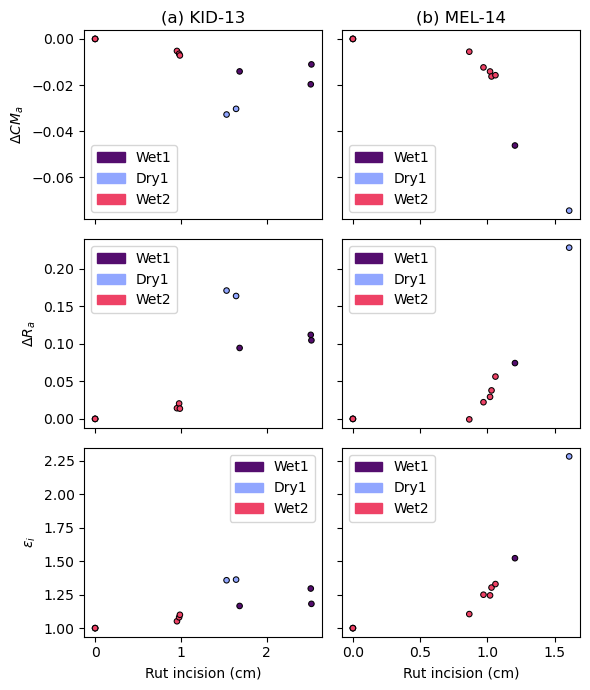

In [8]:
colors = {'Wet1': '#540D6E', 'Dry1': '#91A6FF', 'Wet2': '#EE4266'}
color_list = [colors[group] for group in k13['year']]


fig, ax = plt.subplots(3,2, figsize=(6,7), sharex='col', sharey='row', layout='tight')
# sns.lmplot(data=df, x='Incision', y=r'$\Delta CM_a$', hue='year', col='site', palette= color_list, height=3, ci=None, line_kws={'color':'gray', 'linewidth':0.75}, facet_kws={'despine': False, 'sharex':False, 'sharey':False})
# sns.lmplot(data=df, x='Incision', y=r'$\Delta R_a$', hue='year', col='site', palette= color_list, height=3, ci=None, line_kws={'color':'gray', 'linewidth':0.75}, facet_kws={'despine': False, 'sharex':False, 'sharey':False})
# sns.lmplot(data=df, x='Incision', y=r'$\epsilon_i$', hue='year', col='site', palette= color_list, height=3, ci=None, line_kws={'color':'gray', 'linewidth':0.75}, facet_kws={'despine': False, 'sharex':False, 'sharey':False})

k13.plot.scatter(x='Incision',y=r'$\Delta CM_a$',style='o', s=16, ax=ax[0,0], c=color_list, edgecolors='k', linewidth=0.75)
# a0, b0 = np.polyfit(k13.Incision, k13.CMa, 1)
# ax[0].plot(k13.Incision, a0*k13.Incision+b0, '--', linewidth=0.75, color='gray') 
ax[0,0].set_ylabel(r'$\Delta CM_a$')
k13.plot.scatter(x='Incision',y=r'$\Delta R_a$',style='o', s=16,ax=ax[1,0], c=color_list, edgecolors='k', linewidth=0.75)
# a1, b1 = np.polyfit(k13.Incision, k13.Ra, 1)
# ax[1].plot(k13.Incision, a1*k13.Incision+b1, '--', linewidth=0.75, color='gray')
ax[1,0].set_ylabel(r'$\Delta R_a$') 
k13.plot.scatter(x='Incision',y=r'$\epsilon_i$',style='o', s=16, ax=ax[2,0], c=color_list, edgecolors='k', linewidth=0.75)
# a2, b2 = np.polyfit(k13.Incision, k13.eps_i, 1)
# ax[2].plot(k13.Incision, a2*k13.Incision+b2, '--', linewidth=0.75, color='gray') 
ax[2,0].set_ylabel(r'$\epsilon_i$')
ax[0,0].set_title('(a) KID-13')

ax[2,0].set_xlabel('Rut incision (cm)')




colors = {'Wet1': '#540D6E', 'Dry1': '#91A6FF', 'Wet2': '#EE4266'}
color_list = [colors[group] for group in m14['year']]

# fig, ax = plt.subplots(3,1, figsize=(3,7),sharex=True)
m14.plot.scatter(x='Incision',y=r'$\Delta CM_a$',style='o', s=16, ax=ax[0,1], c=color_list, edgecolors='k', linewidth=0.75)
# a0, b0 = np.polyfit(m14.Incision, m14.CMa, 1)
# ax[0].plot(m14.Incision, a0*m14.Incision+b0, '--', linewidth=0.75, color='gray') 
ax[0,1].set_ylabel(r'$\Delta CM_a$')
m14.plot.scatter(x='Incision',y=r'$\Delta R_a$',style='o', s=16, ax=ax[1,1], c=color_list, edgecolors='k', linewidth=0.75)
# a1, b1 = np.polyfit(m14.Incision, m14.Ra, 1)
# ax[1].plot(m14.Incision, a1*m14.Incision+b1, '--', linewidth=0.75, color='gray')
ax[1,1].set_ylabel(r'$\Delta R_a$') 
m14.plot.scatter(x='Incision',y=r'$\epsilon_i$',style='o', s=16, ax=ax[2,1], c=color_list, edgecolors='k', linewidth=0.75)
# a2, b2 = np.polyfit(m14.Incision, m14.eps_i, 1)
# ax[2].plot(m14.Incision, a2*m14.Incision+b2, '--', linewidth=0.75, color='gray') 
ax[2,1].set_ylabel(r'$\epsilon_i$')
ax[0,1].set_title('(b) MEL-14')

ax[2,1].set_xlabel('Rut incision (cm)')


import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color=colors['Wet1'], label='Wet1'),
    mpatches.Patch(color=colors['Dry1'], label='Dry1'), # add as many as needed
    mpatches.Patch(color=colors['Wet2'], label='Wet2'),
]
for ax in ax.flat:
    ax.legend(handles=legend_handles,
          loc='best')

plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig13.eps', bbox_inches='tight')
plt.show()


In [9]:
# colors = {'Wet1': '#540D6E', 'Dry1': '#91A6FF', 'Wet2': '#EE4266'}
# color_list = [colors[group] for group in m14['year']]

# fig, ax = plt.subplots(3,1, figsize=(3,7),sharex=True)
# m14.plot.scatter(x='Incision',y=r'$\Delta CM_a$',style='o', s=16, ax=ax[0], c=color_list, edgecolors='k', linewidth=0.75)
# # a0, b0 = np.polyfit(m14.Incision, m14.CMa, 1)
# # ax[0].plot(m14.Incision, a0*m14.Incision+b0, '--', linewidth=0.75, color='gray') 
# ax[0].set_ylabel(r'$\Delta CM_a$')
# m14.plot.scatter(x='Incision',y=r'$\Delta R_a$',style='o', s=16, ax=ax[1], c=color_list, edgecolors='k', linewidth=0.75)
# # a1, b1 = np.polyfit(m14.Incision, m14.Ra, 1)
# # ax[1].plot(m14.Incision, a1*m14.Incision+b1, '--', linewidth=0.75, color='gray')
# ax[1].set_ylabel(r'$\Delta R_a$') 
# m14.plot.scatter(x='Incision',y=r'$\epsilon_i$',style='o', s=16, ax=ax[2], c=color_list, edgecolors='k', linewidth=0.75)
# # a2, b2 = np.polyfit(m14.Incision, m14.eps_i, 1)
# # ax[2].plot(m14.Incision, a2*m14.Incision+b2, '--', linewidth=0.75, color='gray') 
# ax[2].set_ylabel(r'$\epsilon_i$')
# ax[0].set_title('(b) MEL-14')

# ax[2].set_xlabel('Rut incision (cm)')

# import matplotlib.patches as mpatches
# legend_handles = [
#     mpatches.Patch(color=colors['Wet1'], label='Wet1'),
#     mpatches.Patch(color=colors['Dry1'], label='Dry1'), # add as many as needed
#     mpatches.Patch(color=colors['Wet2'], label='Wet2'),
# ]
# for ax in ax.flat:
#     ax.legend(handles=legend_handles,
#           loc='best')

# plt.show()

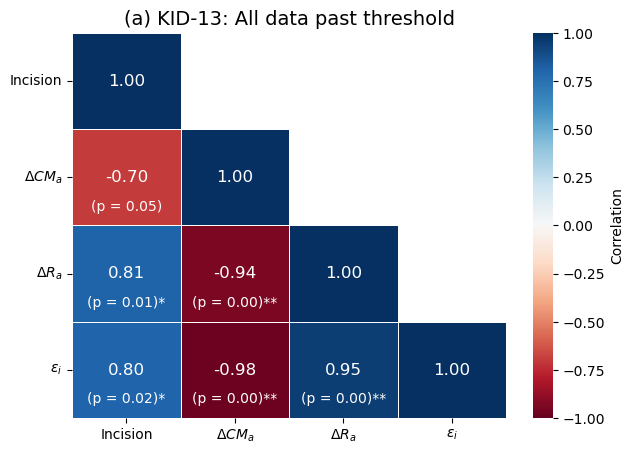

In [10]:
# Generate the correlation matrix afresh
data = k13.drop(columns=['$CM_a$','$R_a$'], index=[0,5,8]).copy()
corr = data.corr(method='pearson', numeric_only=True)

# mask the correlation matrix to diagonal
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


np.fill_diagonal(mask, False)

fix,ax = plt.subplots(figsize=(7,5))
plt.title("(a) KID-13: All data past threshold", fontsize=14)

# Generate heatmap
heatmap = sns.heatmap(corr,
                      annot= True,
                      annot_kws={"fontsize": 12},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      vmin=-1,
                      vmax=1,
                      mask=mask,
                      ax=ax,
                      cbar_kws={'label': 'Correlation'})

# calculate and format p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[1]):
    x = data.iloc[:, i]
    y = data.iloc[:, j]
    mask = ~np.logical_or(np.isnan(x), np.isnan(y))
    if np.sum(mask) > 0:
      p_values[i, j] = pearsonr(x[mask], y[mask])[1]

# Create a dataframe object for p_values
p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

# Mask the p values
mask_pvalues = np.triu(np.ones_like(p_values), k=1)

# Generate maximum and minimum correlation coefficients for p-value annotation color
max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

# Assign p-value annotations, include asterisks for significance
for i in range (p_values.shape[0]):
  for j in range(p_values.shape[1]):
    if mask_pvalues[i, j]:
      p_value = p_values.iloc[i, j]
      if not np.isnan(p_value):
        correlation_value = corr.iloc[i, j]
        text_color = 'white' if correlation_value >= (max_corr - 0.4) or correlation_value <= (min_corr + 0.4) else 'black'
        if p_value <= 0.01:
            #include double asterisks for p-value <= 0.01
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)
        elif p_value <= 0.05:
            #include single asterisk for p-value <= 0.05
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)
        else:
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)

# Customize x-axis labels
x_labels = [textwrap.fill(label.get_text(), 15) for label in ax.get_xticklabels()]
ax.set_xticklabels(x_labels, rotation=0, ha="center")

# Customize y-axis labels
y_labels = [textwrap.fill(label.get_text(), 15) for label in ax.get_yticklabels()]
ax.set_yticklabels(y_labels, rotation=0, ha="right")

# plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig14a.tif', dpi=900, bbox_inches='tight')

# Display the plot
plt.show()


In [15]:
def corr_heatmap_with_pval(df, ax=None, method = 'pearson', figsize=(7,5), title=None):
  """
  df: dataframe to be used. Ensured the dataframe has been sliced to contain only the column you need. It accepts only numerical columns
  method: default uses the pearson method. It overall permits 3 methods; 'pearson', 'spearman' and 'kendall'
  figsize: default is (20, 10) but you can change it based on your preference
  title: Specify the title for your chart, default is None
  """
  # Make a copy of the df
  data = df.copy()
  # Check features correlation
  corr = data.corr(method = method, numeric_only=True)

  # Create a mask to hide the upper triangle
  mask = np.zeros_like(corr, dtype=bool)
  mask[np.triu_indices_from(mask)] = True

  # Set the diagonal elements of the mask to False to display self-correlation
  np.fill_diagonal(mask, False)

  ax.set_title(title, fontsize=14)

  # Create the heatmap with the custom mask
  heatmap = sns.heatmap(corr,
                        annot=True,
                        annot_kws={"fontsize": 12},  # Adjust annotation font size
                        fmt='.2f',
                        linewidths=0.5,
                        cmap='RdBu',
                        mask=mask,
                        ax=ax,
                        cbar_kws={'label': 'Correlation'})

  # Create a function to calculate and format p-values
  p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
  for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
      x = data.iloc[:, i]
      y = data.iloc[:, j]
      mask = ~np.logical_or(np.isnan(x), np.isnan(y))
      if np.sum(mask) > 0:
        if method == 'pearson':
          p_values[i, j] = pearsonr(x[mask], y[mask])[1] #Changes based on the method chosen in the function
        elif method == 'kendall':
          p_values[i, j] = kendalltau(x[mask], y[mask])[1]
        elif method == 'spearman':
          p_values[i, j] = spearmanr(x[mask], y[mask])[1]
  
  p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

  # Create a mask for the p-values heatmap
  mask_pvalues = np.triu(np.ones_like(p_values), k=1)

  # Calculate the highest and lowest correlation coefficients
  max_corr = np.max(corr.max())
  min_corr = np.min(corr.min())
  
  # Annotate the heatmap with p-values and change text color based on correlation value
  for i in range(p_values.shape[0]):
    for j in range(p_values.shape[1]):
      if mask_pvalues[i, j]:
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
          correlation_value = corr.iloc[i, j]
          text_color = 'white' if correlation_value >= (max_corr - 0.4) or correlation_value <= (min_corr + 0.4) else 'black'
          if p_value <= 0.01:
            #include double asterisks for p-value <= 0.01
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)
          elif p_value <= 0.05:
            #include single asterisks for p-value <= 0.05
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)
          else:
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)

  # Customize x-axis labels
  x_labels = [textwrap.fill(label.get_text(), 15) for label in ax.get_xticklabels()]
  ax.set_xticklabels(x_labels, rotation=0, ha="center")

  # Customize y-axis labels
  y_labels = [textwrap.fill(label.get_text(), 15) for label in ax.get_yticklabels()]
  ax.set_yticklabels(y_labels, rotation=0, ha="right")
  ax.grid(False)

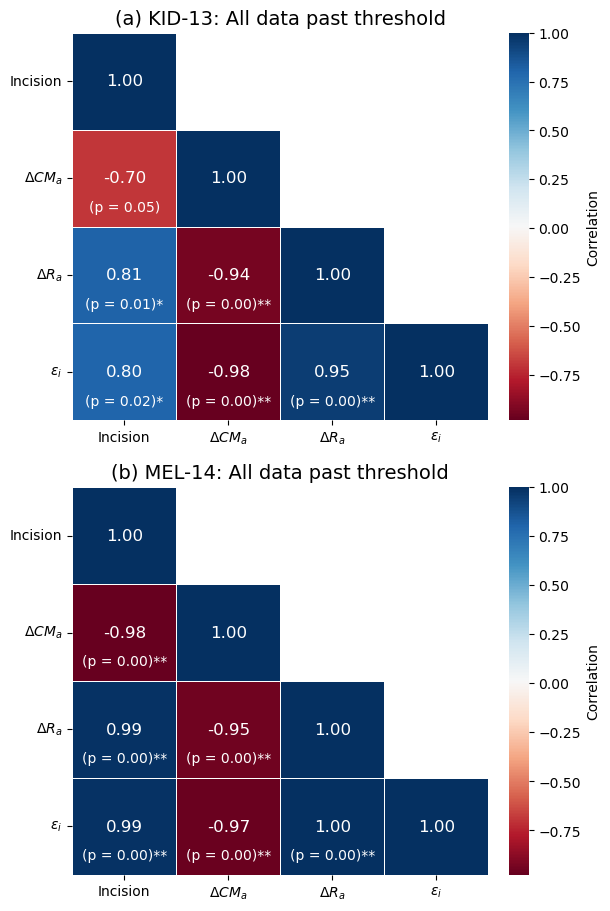

In [16]:
fig = plt.figure(layout='constrained', figsize=(6,9))
subfigs = fig.subfigures(2,1, wspace=0.0)
ax1 = subfigs[0].subplots(1,1)
ax2 = subfigs[1].subplots(1,1)
corr_heatmap_with_pval(k13.drop(columns=['$CM_a$','$R_a$'],index=[0,5,8]),  ax=ax1, method = 'pearson', figsize=(7,5), title='(a) KID-13: All data past threshold')
corr_heatmap_with_pval(m14.drop(columns=['$CM_a$','$R_a$'],index=[11,13,15]),  ax=ax2, method = 'pearson', figsize=(7,5), title='(b) MEL-14: All data past threshold')
plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig14.eps', bbox_inches='tight')

plt.show()

In [ ]:
subfigs[1].subplots(1,1)

<Axes: >

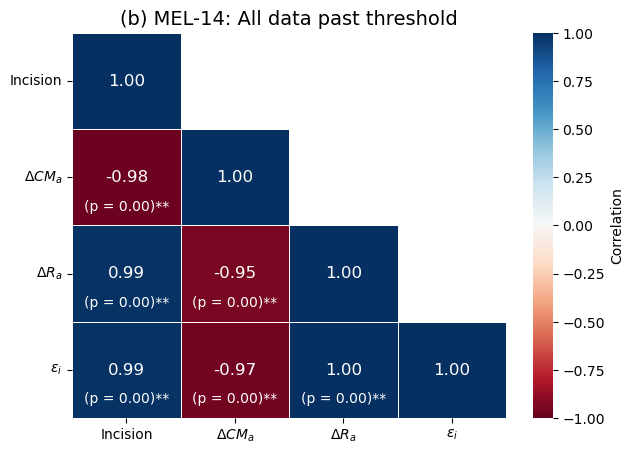

In [ ]:
# Generate the correlation matrix afresh
data = m14.drop(columns=['$CM_a$','$R_a$'], index=[11,13,15]).copy()
corr = data.corr(method='pearson', numeric_only=True)

# mask the correlation matrix to diagonal
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

fix,ax = plt.subplots(figsize=(7,5))
plt.title("(b) MEL-14: All data past threshold", fontsize=14)

# Generate heatmap
heatmap = sns.heatmap(corr,
                      annot= True,
                      annot_kws={"fontsize": 12},
                      fmt='.2f',
                      linewidths=0.5,
                      cmap='RdBu',
                      vmin=-1,
                      vmax=1,
                      mask=mask,
                      ax=ax,
                      cbar_kws={'label': 'Correlation'})

# calculate and format p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
  for j in range(i+1, corr.shape[1]):
    x = data.iloc[:, i]
    y = data.iloc[:, j]
    mask = ~np.logical_or(np.isnan(x), np.isnan(y))
    if np.sum(mask) > 0:
      p_values[i, j] = pearsonr(x[mask], y[mask])[1]

# Create a dataframe object for p_values
p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

# Mask the p values
mask_pvalues = np.triu(np.ones_like(p_values), k=1)

# Generate maximum and minimum correlation coefficients for p-value annotation color
max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

# Assign p-value annotations, include asterisks for significance
for i in range (p_values.shape[0]):
  for j in range(p_values.shape[1]):
    if mask_pvalues[i, j]:
      p_value = p_values.iloc[i, j]
      if not np.isnan(p_value):
        correlation_value = corr.iloc[i, j]
        text_color = 'white' if correlation_value >= (max_corr - 0.4) or correlation_value <= (min_corr + 0.4) else 'black'
        if p_value <= 0.01:
            #include double asterisks for p-value <= 0.01
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})**',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)
        elif p_value <= 0.05:
            #include single asterisk for p-value <= 0.05
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})*',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)
        else:
            ax.text(i + 0.5, j + 0.8, f'(p = {p_value:.2f})',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=10,
                    color=text_color)

# Customize x-axis labels
x_labels = [textwrap.fill(label.get_text(), 13) for label in ax.get_xticklabels()]
ax.set_xticklabels(x_labels, rotation=0, ha="center")

# Customize y-axis labels
y_labels = [textwrap.fill(label.get_text(), 13) for label in ax.get_yticklabels()]
ax.set_yticklabels(y_labels, rotation=0, ha="right")

plt.savefig('/home/adalvis/github/micro_diff/data/savefigs/Fig14b.tif', dpi=900, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
corr_heatmap_with_pval(m14.drop(columns=['$CM_a$','$R_a$'], index=[11,13,15]), method = 'pearson', figsize=(9,5), title='MEL-14: All data')